# Script visant à comparer les informations sur les candidats (profession et parti) entre le corpus et l'ensemble des candidats en France.

## Comparaison partis

/var/folders/yd/tv7y7f4x2c1b6b4pslkxg4j00000gn/T/ipykernel_59320/3717178566.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_france = pd.read_csv(file_france)


Données chargées:
- Eure-et-Loir & Loir-et-Cher: 211 candidatures
- France: 17331 candidatures

ANALYSE DES PARTIS POLITIQUES - TITULAIRES UNIQUEMENT

 SOUTIENS 'NON MENTIONNÉ' (exclus de l'analyse):
  Eure-et-Loir & Loir-et-Cher: 143 (67.8%)
  France: 10746 (62.0%)

 RÉPARTITION POLITIQUE (hors 'non mentionné'):
Base d'analyse: 68 candidatures (Eure-et-Loir & Loir-et-Cher)
Base d'analyse: 6585 candidatures (France)

Eure-et-Loir & Loir-et-Cher:
  SOC: 17.6%
  COM: 17.6%
  GAU: 11.8%
  Autres: 10.3%
  AGR: 8.8%
  PSU: 8.8%
  CEN: 5.9%
  CEN-D: 5.9%
  EXG: 5.9%
  EXD: 2.9%
  RAD: 1.5%
  ECO: 1.5%
  RDG: 1.5%

France (top 10):
  COM: 24.5%
  SOC: 17.2%
  GAU: 12.6%
  Autres: 10.3%
  PSU: 9.4%
  CEN: 7.4%
  EXG: 5.3%
  CEN-D: 4.2%
  AGR: 3.8%
  ECO: 1.9%

🔍 ÉCARTS SIGNIFICATIFS (>2 points):
  COM: -6.8 points
  AGR: +5.1 points

ANALYSE DES CANDIDATS UNIQUES - TITULAIRES
Candidats uniques (hors 'non mentionné'):
- Eure-et-Loir & Loir-et-Cher: 57
- France: 5022

Répartition politique (cand

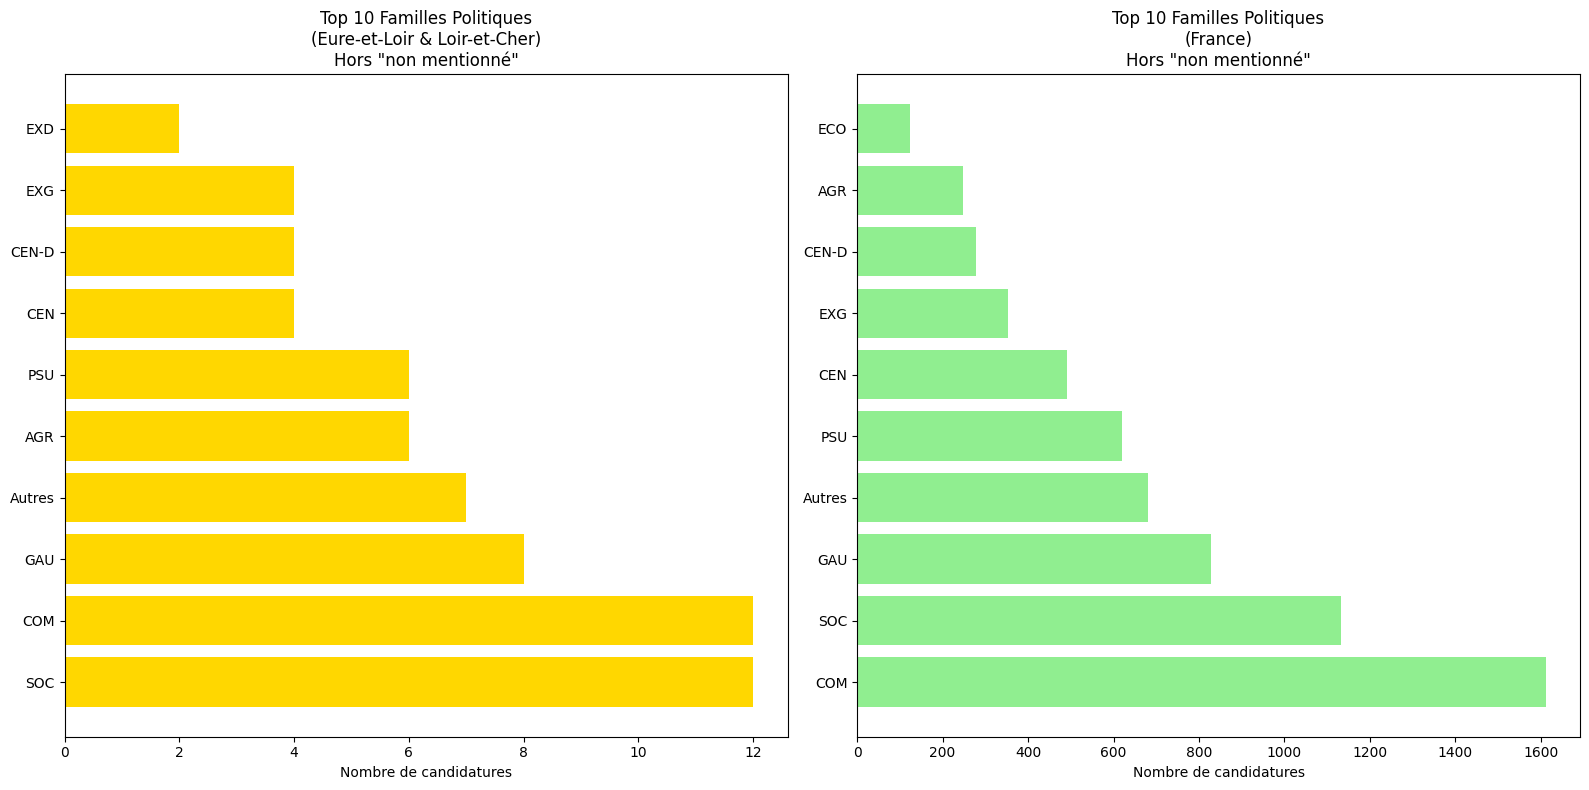


 Analyse des partis politiques terminée!
 Graphique sauvegardé: parties_comparison.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class PartyAnalysis:
    def __init__(self, file_dept, file_france):
        """Analyse des partis politiques avec classification enrichie"""
        self.df_dept = pd.read_csv(file_dept)
        self.df_france = pd.read_csv(file_france)
        
        # Filtrer tour 1
        self.df_dept_t1 = self.df_dept[self.df_dept['contexte-tour'] == 1].copy()
        self.df_france_t1 = self.df_france[self.df_france['contexte-tour'] == 1].copy()
        
        self.init_categories()
        print(f"Données chargées:")
        print(f"- Eure-et-Loir & Loir-et-Cher: {len(self.df_dept_t1)} candidatures")
        print(f"- France: {len(self.df_france_t1)} candidatures")
    
    def init_categories(self):
        """Classification des partis politiques"""
        self.categories = {
            'EXG - Extrême gauche': [
                'trotsk', 'lutte ouvriere', 'lutte ouvrière', 'ligue communiste', 'extrême gauche',
                'révolutionnaire', 'anarchiste', 'maoïste', 'organisation communiste des travailleurs',
                'ligue communiste révolutionnaire', 'marxistes-léninistes', 'travailleurs'
            ],
            'ECO - Écologie': [
                'écologie', 'écologiste', 'écologistes', 'ecologie'
            ],
            'COM - Communiste': [
                'parti communiste français', 'parti communiste', 'pcf', 
                'communiste français'
            ],  
            'PSU - PSU et front autogestionnaire': [
                'parti socialiste unifié', 'psu', 'front autogestionnaire',
                'autogestionnaire', 'comité pour l\'autogestion'
            ],
            'SOC - SFIO/PS': [
                'section française de l\'internationale ouvrière', 'sfio', 
                'parti socialiste', 'socialiste',
            ],
            'RDG - Radical de gauche': [
                'radical de gauche', 'mouvement des radicaux de gauche'
            ],
            'RAD - Radical': [
                'parti radical-socialiste', 'parti radical', 'radical socialiste',
                'entente républicaine et radicale', 'prrs', 'prrrs'
            ],
            'CEN - Centre (MRP, CD, UDF)': [
                'mouvement républicain populaire', 'mrp', 'centre démocrate',
                'centre des démocrates sociaux', 'démocratie et progrès', 'centre républicain',
                'centre démocrate et républicain', 'centriste'
            ],
            'AGR - Paysans (CNI, CNIP)': [
                'centre national des indépendants et paysans', 'cnip',
                'centre national des indépendants', 'cni', 'indépendants et paysans', 'paysan'
            ],
            'CEN-D - Centre droit (RI, UDF)': [
                'parti républicain', 'républicain indépendant', 'républicains indépendants' 'alliance républicaine',
                'alliance républicaine pour les libertés et le progrès',
                'union pour la démocratie française', 'udf'
            ],
            'GAU - Gaullistes (UNR, UDR, URP, RPR)': [
                'union pour la nouvelle république', 'unr',
                'union pour la défense de la république', 'udr',
                'union des démocrates pour la république',
                'union des républicains de progrès', 'urp',
                'rassemblement pour la république', 'rpr',
                'gaulliste', 'association pour la ve république',
                'rassemblement', 'fidélité gaulliste', 've republique',
                've république'
            ],
            'EXD - Extrême droite': [
                'front national', 'union des forces françaises', 'uff', 'poujadiste'
                'extrême-droite', 'union de défense des commerçants et artisans'
            ]
        }
    
    def categorize_party(self, soutien, liste):
        """Catégorise un parti/soutien politique en excluant 'non mentionné'"""
        # Combiner soutien et liste
        combined = f"{soutien or ''} {liste or ''}".lower().strip()
        
        if not combined or combined == ' ':
            return 'Non renseigné'
        
        # Exclure explicitement "non mentionné"
        if 'non mentionné' in combined:
            return 'Non mentionné'
        
        # Vérifier les catégories dans l'ordre de priorité
        for category, keywords in self.categories.items():
            if any(keyword.lower() in combined for keyword in keywords):
                return category
        
        return 'Autres'
    
    def analyze_parties(self):
        """Analyse comparative des partis - TITULAIRES UNIQUEMENT"""
        print("\n" + "="*60)
        print("ANALYSE DES PARTIS POLITIQUES - TITULAIRES UNIQUEMENT")
        print("="*60)
        
        # Catégoriser
        self.df_dept_t1['parti_cat'] = self.df_dept_t1.apply(
            lambda row: self.categorize_party(row['titulaire-soutien'], row['titulaire-liste']), 
            axis=1
        )
        self.df_france_t1['parti_cat'] = self.df_france_t1.apply(
            lambda row: self.categorize_party(row['titulaire-soutien'], row['titulaire-liste']), 
            axis=1
        )
        
        # Calculer les pourcentages "Non mentionné"
        non_mentionne_dept = (self.df_dept_t1['parti_cat'] == 'Non mentionné').sum()
        non_mentionne_france = (self.df_france_t1['parti_cat'] == 'Non mentionné').sum()
        pct_non_mentionne_dept = (non_mentionne_dept / len(self.df_dept_t1)) * 100
        pct_non_mentionne_france = (non_mentionne_france / len(self.df_france_t1)) * 100
        
        print(f"\n SOUTIENS 'NON MENTIONNÉ' (exclus de l'analyse):")
        print(f"  Eure-et-Loir & Loir-et-Cher: {non_mentionne_dept} ({pct_non_mentionne_dept:.1f}%)")
        print(f"  France: {non_mentionne_france} ({pct_non_mentionne_france:.1f}%)")
        
        # Exclure "Non mentionné" pour l'analyse
        df_dept_analyse = self.df_dept_t1[self.df_dept_t1['parti_cat'] != 'Non mentionné'].copy()
        df_france_analyse = self.df_france_t1[self.df_france_t1['parti_cat'] != 'Non mentionné'].copy()
        
        # Statistiques sur les données analysables
        parti_dept = df_dept_analyse['parti_cat'].value_counts(normalize=True) * 100
        parti_france = df_france_analyse['parti_cat'].value_counts(normalize=True) * 100
        
        print(f"\n RÉPARTITION POLITIQUE (hors 'non mentionné'):")
        print(f"Base d'analyse: {len(df_dept_analyse)} candidatures (Eure-et-Loir & Loir-et-Cher)")
        print(f"Base d'analyse: {len(df_france_analyse)} candidatures (France)")
        
        print("\nEure-et-Loir & Loir-et-Cher:")
        for cat, pct in parti_dept.sort_values(ascending=False).items():
            sigle = cat.split(' - ')[0] if ' - ' in cat else cat
            print(f"  {sigle}: {pct:.1f}%")
        
        print("\nFrance (top 10):")
        for cat, pct in parti_france.sort_values(ascending=False).head(10).items():
            sigle = cat.split(' - ')[0] if ' - ' in cat else cat
            print(f"  {sigle}: {pct:.1f}%")
        
        # Écarts significatifs
        print("\n🔍 ÉCARTS SIGNIFICATIFS (>2 points):")
        for cat in parti_dept.index:
            if cat in parti_france.index:
                ecart = parti_dept[cat] - parti_france[cat]
                if abs(ecart) > 2:
                    sigle = cat.split(' - ')[0] if ' - ' in cat else cat
                    signe = "+" if ecart > 0 else ""
                    print(f"  {sigle}: {signe}{ecart:.1f} points")
        
        return parti_dept, parti_france
    
    def analyze_candidates_uniques(self):
        """Analyse des candidats uniques - TITULAIRES"""
        print("\n" + "="*60)
        print("ANALYSE DES CANDIDATS UNIQUES - TITULAIRES")
        print("="*60)
        
        # Exclure "Non mentionné" pour l'analyse des candidats uniques aussi
        df_dept_analyse = self.df_dept_t1[self.df_dept_t1['parti_cat'] != 'Non mentionné'].copy()
        df_france_analyse = self.df_france_t1[self.df_france_t1['parti_cat'] != 'Non mentionné'].copy()
        
        # Candidats uniques par nom+prénom
        unique_dept = df_dept_analyse.groupby(['titulaire-nom', 'titulaire-prenom']).agg({
            'parti_cat': 'first'
        }).reset_index()
        
        unique_france = df_france_analyse.groupby(['titulaire-nom', 'titulaire-prenom']).agg({
            'parti_cat': 'first'
        }).reset_index()
        
        print(f"Candidats uniques (hors 'non mentionné'):")
        print(f"- Eure-et-Loir & Loir-et-Cher: {len(unique_dept)}")
        print(f"- France: {len(unique_france)}")
        
        # Répartition politique des candidats uniques
        parti_unique_dept = unique_dept['parti_cat'].value_counts(normalize=True) * 100
        
        print("\nRépartition politique (candidats uniques, Eure-et-Loir & Loir-et-Cher):")
        for cat, pct in parti_unique_dept.sort_values(ascending=False).items():
            sigle = cat.split(' - ')[0] if ' - ' in cat else cat
            print(f"  {sigle}: {pct:.1f}%")
    
    def show_autres_parties(self):
        """Affiche les partis classés en 'Autres'"""
        print("\n" + "="*60)
        print("PARTIS/SOUTIENS CLASSÉS EN 'AUTRES'")
        print("="*60)
        
        # Exclure "Non mentionné" de l'analyse des autres
        df_france_analyse = self.df_france_t1[self.df_france_t1['parti_cat'] != 'Non mentionné'].copy()
        autres_france = df_france_analyse[df_france_analyse['parti_cat'] == 'Autres']
        autres_soutiens = []
        
        for _, row in autres_france.iterrows():
            soutien_complet = f"{row['titulaire-soutien'] or ''} {row['titulaire-liste'] or ''}".strip()
            if soutien_complet:
                autres_soutiens.append(soutien_complet)
        
        autres_counts = pd.Series(autres_soutiens).value_counts()
        
        print(f"Nombre de soutiens 'Autres': {len(autres_counts)}")
        print(f"Nombre de candidatures 'Autres': {len(autres_france)}")
        pct_autres = (len(autres_france) / len(df_france_analyse)) * 100
        print(f"Pourcentage 'Autres': {pct_autres:.1f}% (hors 'non mentionné')")
        
        print(f"\nTop 50 des soutiens 'Autres' les plus fréquents:")
        for i, (parti, count) in enumerate(autres_counts.head(50).items(), 1):
            pct = (count / len(df_france_analyse)) * 100
            print(f"  {i:2d}. {parti} ({count} fois, {pct:.2f}%)")
    
    def create_visualization(self):
        """Crée un graphique comparatif"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Exclure "Non mentionné" des graphiques
        df_dept_graph = self.df_dept_t1[self.df_dept_t1['parti_cat'] != 'Non mentionné'].copy()
        df_france_graph = self.df_france_t1[self.df_france_t1['parti_cat'] != 'Non mentionné'].copy()
        
        parti_dept = df_dept_graph['parti_cat'].value_counts().head(10)
        parti_france = df_france_graph['parti_cat'].value_counts().head(10)
        
        # Graphique départements
        y_pos = np.arange(len(parti_dept))
        ax1.barh(y_pos, parti_dept.values, color='gold')
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels([p.split(' - ')[0] if ' - ' in p else p for p in parti_dept.index])
        ax1.set_xlabel('Nombre de candidatures')
        ax1.set_title('Top 10 Familles Politiques\n(Eure-et-Loir & Loir-et-Cher)\nHors "non mentionné"')
        
        # Graphique France
        y_pos = np.arange(len(parti_france))
        ax2.barh(y_pos, parti_france.values, color='lightgreen')
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels([p.split(' - ')[0] if ' - ' in p else p for p in parti_france.index])
        ax2.set_xlabel('Nombre de candidatures')
        ax2.set_title('Top 10 Familles Politiques\n(France)\nHors "non mentionné"')
        
        plt.tight_layout()
        plt.savefig('parties_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def detailed_party_breakdown(self):
        """Analyse détaillée par famille politique - TITULAIRES"""
        print("\n" + "="*60)
        print("ANALYSE DÉTAILLÉE PAR FAMILLE POLITIQUE - TITULAIRES")
        print("="*60)
        
        # Exclure "Non mentionné" pour les statistiques détaillées
        df_dept_analyse = self.df_dept_t1[self.df_dept_t1['parti_cat'] != 'Non mentionné'].copy()
        df_france_analyse = self.df_france_t1[self.df_france_t1['parti_cat'] != 'Non mentionné'].copy()
        
        for category, keywords in self.categories.items():
            sigle = category.split(' - ')[0]
            nom_complet = category.split(' - ')[1] if ' - ' in category else category
            
            # Compter dans les deux corpus (hors non mentionné)
            count_dept = (df_dept_analyse['parti_cat'] == category).sum()
            count_france = (df_france_analyse['parti_cat'] == category).sum()
            
            pct_dept = (count_dept / len(df_dept_analyse)) * 100 if len(df_dept_analyse) > 0 else 0
            pct_france = (count_france / len(df_france_analyse)) * 100 if len(df_france_analyse) > 0 else 0
            
            print(f"\n{sigle} - {nom_complet}:")
            print(f"  Eure-et-Loir & Loir-et-Cher: {count_dept} ({pct_dept:.1f}%)")
            print(f"  France: {count_france} ({pct_france:.1f}%)")
            if count_dept > 0 and count_france > 0:
                ecart = pct_dept - pct_france
                print(f"  Écart: {ecart:+.1f} points")

def main():
    """Fonction principale"""
    analysis = PartyAnalysis('/Users/charlielezin/Downloads/archelect_search-2.csv', 
                            '/Users/charlielezin/Downloads/archelect_search-5.csv')
    
    # Analyses
    analysis.analyze_parties()
    analysis.analyze_candidates_uniques()
    analysis.show_autres_parties()
    analysis.detailed_party_breakdown()
    analysis.create_visualization()
    
    print(" Graphique sauvegardé: parties_comparison.png")

if __name__ == "__main__":
    main()

## Comparaison professions

/var/folders/yd/tv7y7f4x2c1b6b4pslkxg4j00000gn/T/ipykernel_59320/451480805.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_france = pd.read_csv(file_france)


Données chargées:
- Eure-et-Loir & Loir-et-Cher: 211 candidatures
- France: 17331 candidatures

ANALYSE DES PROFESSIONS (Classification Mattei Dogan)

 PROFESSIONS 'NON MENTIONNÉ' (exclues de l'analyse):
  Eure-et-Loir & Loir-et-Cher: 64 (30.3%)
  France: 5372 (31.0%)

📊 RÉPARTITION PROFESSIONNELLE (hors 'non mentionné'):
Base d'analyse: 147 candidatures (Eure-et-Loir & Loir-et-Cher)
Base d'analyse: 11959 candidatures (France)

Eure-et-Loir & Loir-et-Cher:
  Professeurs et instituteurs: 17.0%
  Hommes de loi: 14.3%
  Hauts fonctionnaires: 12.9%
  Employés et fonctionnaires subalternes: 11.6%
  Ouvriers industrie artisans domestiques: 9.5%
  Divers: 9.5%
  Industriels commerçants artisans négociants: 8.2%
  Médecins et pharmaciens: 6.8%
  Ingénieurs et architectes: 4.8%
  Agriculteurs: 4.8%
  Journalistes: 0.7%

France (top 10):
  Professeurs et instituteurs: 19.4%
  Divers: 14.9%
  Employés et fonctionnaires subalternes: 10.2%
  Médecins et pharmaciens: 9.4%
  Ouvriers industrie artisa

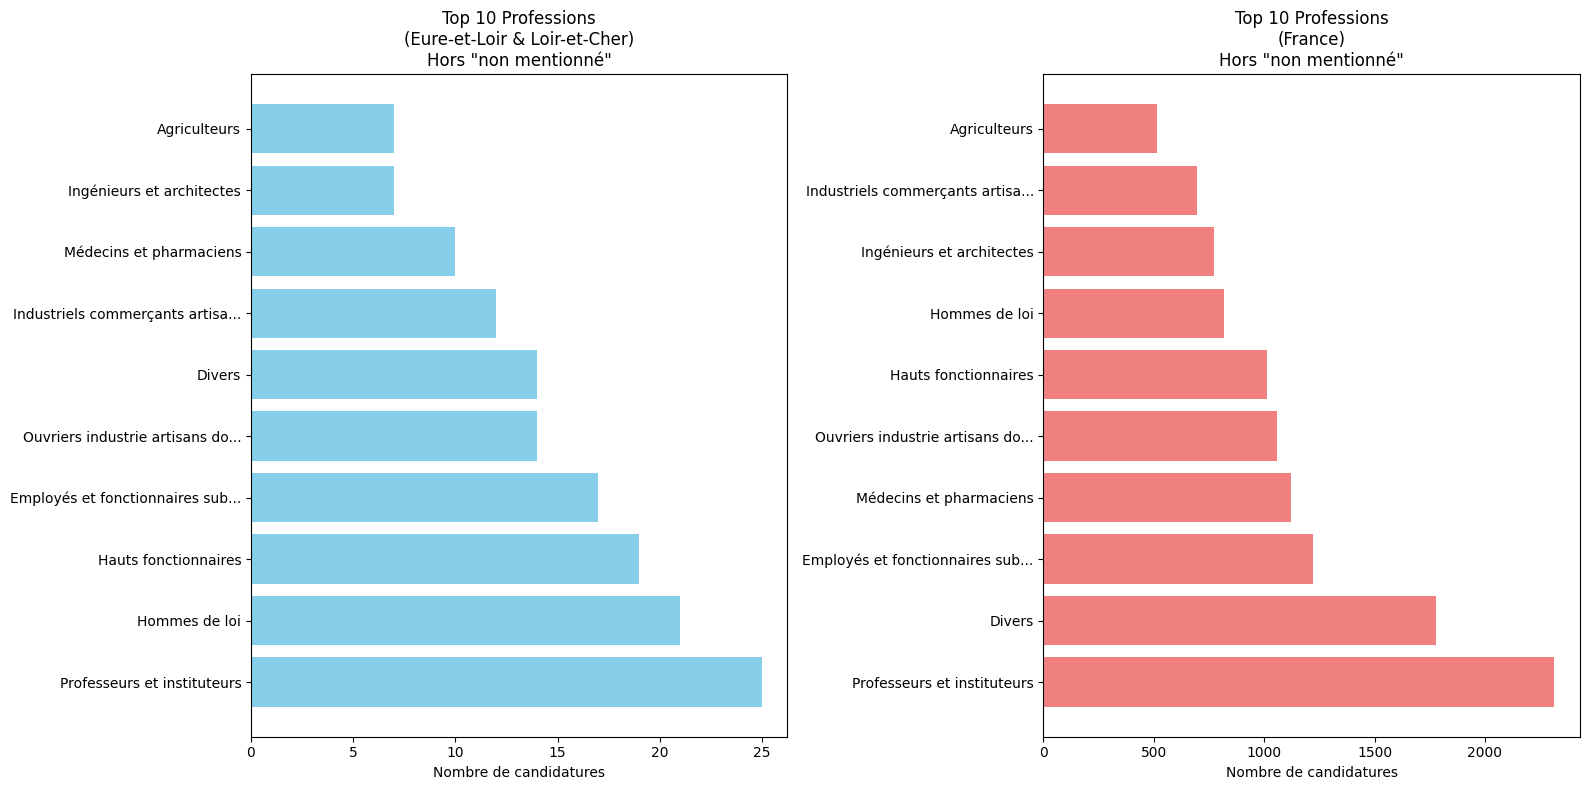


 Analyse des professions terminée!
 Graphique sauvegardé: professions_comparison.png


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class ProfessionAnalysis:
    def __init__(self, file_dept, file_france):
        """Analyse des professions selon la classification Mattei Dogan"""
        self.df_dept = pd.read_csv(file_dept)
        self.df_france = pd.read_csv(file_france)
        
        # Filtrer tour 1
        self.df_dept_t1 = self.df_dept[self.df_dept['contexte-tour'] == 1].copy()
        self.df_france_t1 = self.df_france[self.df_france['contexte-tour'] == 1].copy()
        
        self.init_categories()
        print(f"Données chargées:")
        print(f"- Eure-et-Loir & Loir-et-Cher: {len(self.df_dept_t1)} candidatures")
        print(f"- France: {len(self.df_france_t1)} candidatures")
    
    def init_categories(self):
        """Classification Mattei Dogan enrichie avec féminisation"""
        self.categories = {
            'Hommes de loi': [
                'avocat', 'avocate', 'avoué', 'avouée', 'notaire', 'huissier', 'huissière',
                'magistrat', 'magistrate', 'juge', 'procureur', 'procureure', 'juriste', 
                'légiste', 'barreau'
            ],
            'Médecins et pharmaciens': [
                'médecin', 'docteur', 'docteure', 'pharmacien', 'pharmacienne', 'chirurgien', 
                'chirurgienne', 'vétérinaire', 'dentiste', 'sage-femme', 'infirmier', 'infirmière'
            ],
            'Professeurs et instituteurs': [
                'professeur', 'professeure', 'instituteur', 'institutrice', 'enseignant', 
                'enseignante', 'maître', 'maîtresse', 'éducateur', 'éducatrice', 'école', 
                'proviseur', 'principal', 'principale', 'université', 'faculté', 'cours'
            ],
            'Hauts fonctionnaires': [
                'préfet', 'préfète', 'consul', 'ambassadeur', 'ambassadrice', 'attaché', 
                'attachée', 'inspecteur général', 'inspectrice générale', 'administrateur', 
                'administratrice', 'trésorier', 'trésorière', 'receveur', 'receveuse', 
                'contrôleur', 'contrôleuse', 'directeur', 'directrice', 'ponts et chaussées', 
                'insee', 'ministère', 'cabinet', 'gouverneur'
            ],
            'Journalistes': [
                'journaliste', 'rédacteur', 'rédactrice', 'correspondant', 'correspondante', 
                'reporter', 'chroniqueur', 'chroniqueuse', 'journal', 'presse', 'publiciste'
            ],
            'Ingénieurs et architectes': [
                'ingénieur', 'ingénieure', 'architecte', 'géomètre', 'expert', 'experte', 
                'technicien', 'technicienne', 'métreur', 'métreuse'
            ],
            'Industriels commerçants artisans négociants': [
                'industriel', 'industrielle', 'commerçant', 'commerçante', 'négociant', 
                'négociante', 'artisan', 'artisane', 'entrepreneur', 'entrepreneuse', 
                'patron', 'patronne', 'dirigeant', 'dirigeante', 'gérant', 'gérante', 
                'marchand', 'marchande', 'représentant', 'représentante', 'banquier', 
                'banquière', 'hôtelier', 'hôtelière', 'imprimeur', 'imprimeuse', 
                'garagiste', 'transporteur', 'transporteuse'
            ],
            'Cadres': [
                'cadre', 'chef de service', 'responsable', 'directeur commercial', 
                'directrice commerciale', 'chef de bureau', 'contremaître', 'contremaîtresse', 
                'chef de brigade'
            ],
            'Agriculteurs': [
                'agriculteur', 'agricultrice', 'cultivateur', 'cultivatrice', 'exploitant', 
                'exploitante', 'fermier', 'fermière', 'éleveur', 'éleveuse', 'maraîcher', 
                'maraîchère', 'viticulteur', 'viticultrice', 'forestier', 'forestière', 
                'meunier', 'meunière', 'aviculture'
            ],
            'Employés et fonctionnaires subalternes': [
                'employé', 'employée', 'secrétaire', 'commis', 'agent', 'agente', 'facteur', 
                'factrice', 'postier', 'postière', 'gendarme', 'policier', 'policière', 
                'ptt', 'sncf', 'edf', 'fonctionnaire'
            ],
            'Ouvriers industrie artisans domestiques': [
                'ouvrier', 'ouvrière', 'mécanicien', 'mécanicienne', 'électricien', 
                'électricienne', 'maçon', 'maçonne', 'peintre', 'cheminot', 'cheminote', 
                'textile', 'métallurgiste', 'mineur', 'mineuse', 'typographe', 'ajusteur', 
                'ajusteuse'
            ],
            'Ouvriers agricoles': [
                'ouvrier agricole', 'ouvrière agricole', 'journalier', 'journalière', 
                'berger', 'bergère', 'bûcheron', 'bûcheronne'
            ]
        }
    
    def categorize_profession(self, profession):
        """Catégorise une profession en excluant 'non mentionné'"""
        if pd.isna(profession) or not str(profession).strip():
            return 'Non renseigné'
        
        prof = str(profession).lower().strip()
        
        # Exclure explicitement "non mentionné"
        if 'non mentionné' in prof:
            return 'Non mentionné'
        
        for category, keywords in self.categories.items():
            if any(keyword in prof for keyword in keywords):
                return category
        
        return 'Divers'
    
    def analyze_professions(self):
        """Analyse comparative des professions"""
        print("\n" + "="*60)
        print("ANALYSE DES PROFESSIONS (Classification Mattei Dogan)")
        print("="*60)
        
        # Catégoriser
        self.df_dept_t1['prof_cat'] = self.df_dept_t1['titulaire-profession'].apply(self.categorize_profession)
        self.df_france_t1['prof_cat'] = self.df_france_t1['titulaire-profession'].apply(self.categorize_profession)
        
        # Calculer les pourcentages "Non mentionné"
        non_mentionne_dept = (self.df_dept_t1['prof_cat'] == 'Non mentionné').sum()
        non_mentionne_france = (self.df_france_t1['prof_cat'] == 'Non mentionné').sum()
        pct_non_mentionne_dept = (non_mentionne_dept / len(self.df_dept_t1)) * 100
        pct_non_mentionne_france = (non_mentionne_france / len(self.df_france_t1)) * 100
        
        print(f"\n PROFESSIONS 'NON MENTIONNÉ' (exclues de l'analyse):")
        print(f"  Eure-et-Loir & Loir-et-Cher: {non_mentionne_dept} ({pct_non_mentionne_dept:.1f}%)")
        print(f"  France: {non_mentionne_france} ({pct_non_mentionne_france:.1f}%)")
        
        # Exclure "Non mentionné" pour l'analyse
        df_dept_analyse = self.df_dept_t1[self.df_dept_t1['prof_cat'] != 'Non mentionné'].copy()
        df_france_analyse = self.df_france_t1[self.df_france_t1['prof_cat'] != 'Non mentionné'].copy()
        
        # Statistiques sur les données analysables
        prof_dept = df_dept_analyse['prof_cat'].value_counts(normalize=True) * 100
        prof_france = df_france_analyse['prof_cat'].value_counts(normalize=True) * 100
        
        print(f"\n RÉPARTITION PROFESSIONNELLE (hors 'non mentionné'):")
        print(f"Base d'analyse: {len(df_dept_analyse)} candidatures (Eure-et-Loir & Loir-et-Cher)")
        print(f"Base d'analyse: {len(df_france_analyse)} candidatures (France)")
        
        print("\nEure-et-Loir & Loir-et-Cher:")
        for cat, pct in prof_dept.sort_values(ascending=False).items():
            print(f"  {cat}: {pct:.1f}%")
        
        print("\nFrance (top 10):")
        for cat, pct in prof_france.sort_values(ascending=False).head(10).items():
            print(f"  {cat}: {pct:.1f}%")
        
        # Écarts significatifs
        print("\n ÉCARTS SIGNIFICATIFS (>2 points):")
        for cat in prof_dept.index:
            if cat in prof_france.index:
                ecart = prof_dept[cat] - prof_france[cat]
                if abs(ecart) > 2:
                    signe = "+" if ecart > 0 else ""
                    print(f"  {cat}: {signe}{ecart:.1f} points")
        
        return prof_dept, prof_france
    
    def analyze_candidates_uniques(self):
        """Analyse des candidats uniques"""
        print("\n" + "="*60)
        print("ANALYSE DES CANDIDATS UNIQUES")
        print("="*60)
        
        # Exclure "Non mentionné" pour l'analyse des candidats uniques aussi
        df_dept_analyse = self.df_dept_t1[self.df_dept_t1['prof_cat'] != 'Non mentionné'].copy()
        df_france_analyse = self.df_france_t1[self.df_france_t1['prof_cat'] != 'Non mentionné'].copy()
        
        # Candidats uniques par nom+prénom
        unique_dept = df_dept_analyse.groupby(['titulaire-nom', 'titulaire-prenom']).agg({
            'prof_cat': 'first'
        }).reset_index()
        
        unique_france = df_france_analyse.groupby(['titulaire-nom', 'titulaire-prenom']).agg({
            'prof_cat': 'first'
        }).reset_index()
        
        print(f"Candidats uniques (hors 'non mentionné'):")
        print(f"- Eure-et-Loir & Loir-et-Cher: {len(unique_dept)}")
        print(f"- France: {len(unique_france)}")
        
        # Répartition professionnelle des candidats uniques
        prof_unique_dept = unique_dept['prof_cat'].value_counts(normalize=True) * 100
        
        print("\nRépartition professionnelle (candidats uniques, Eure-et-Loir & Loir-et-Cher):")
        for cat, pct in prof_unique_dept.sort_values(ascending=False).items():
            print(f"  {cat}: {pct:.1f}%")
    
    def show_divers_professions(self):
        """Affiche les professions classées en 'Divers'"""
        print("\n" + "="*60)
        print("PROFESSIONS CLASSÉES EN 'DIVERS'")
        print("="*60)
        
        # Exclure "Non mentionné" de l'analyse des divers
        df_france_analyse = self.df_france_t1[self.df_france_t1['prof_cat'] != 'Non mentionné'].copy()
        divers_france = df_france_analyse[df_france_analyse['prof_cat'] == 'Divers']['titulaire-profession']
        divers_counts = divers_france.value_counts()
        
        print(f"Nombre de professions 'Divers': {len(divers_counts)}")
        print(f"Nombre de candidatures 'Divers': {len(divers_france)}")
        pct_divers = (len(divers_france) / len(df_france_analyse)) * 100
        print(f"Pourcentage 'Divers': {pct_divers:.1f}% (hors 'non mentionné')")
        
        print(f"\nTop 50 des professions 'Divers' les plus fréquentes:")
        for i, (prof, count) in enumerate(divers_counts.head(50).items(), 1):
            pct = (count / len(df_france_analyse)) * 100
            print(f"  {i:2d}. {prof} ({count} fois, {pct:.2f}%)")
    
    def create_visualization(self):
        """Crée un graphique comparatif"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Exclure "Non mentionné" des graphiques
        df_dept_graph = self.df_dept_t1[self.df_dept_t1['prof_cat'] != 'Non mentionné'].copy()
        df_france_graph = self.df_france_t1[self.df_france_t1['prof_cat'] != 'Non mentionné'].copy()
        
        prof_dept = df_dept_graph['prof_cat'].value_counts().head(10)
        prof_france = df_france_graph['prof_cat'].value_counts().head(10)
        
        # Graphique départements
        y_pos = np.arange(len(prof_dept))
        ax1.barh(y_pos, prof_dept.values, color='skyblue')
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels([p[:30] + '...' if len(p) > 30 else p for p in prof_dept.index])
        ax1.set_xlabel('Nombre de candidatures')
        ax1.set_title('Top 10 Professions\n(Eure-et-Loir & Loir-et-Cher)\nHors "non mentionné"')
        
        # Graphique France
        y_pos = np.arange(len(prof_france))
        ax2.barh(y_pos, prof_france.values, color='lightcoral')
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels([p[:30] + '...' if len(p) > 30 else p for p in prof_france.index])
        ax2.set_xlabel('Nombre de candidatures')
        ax2.set_title('Top 10 Professions\n(France)\nHors "non mentionné"')
        
        plt.tight_layout()
        plt.savefig('professions_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

def main():
    """Fonction principale"""
    analysis = ProfessionAnalysis('/Users/charlielezin/Downloads/archelect_search-2.csv', 
                                  '/Users/charlielezin/Downloads/archelect_search-5.csv')
    
    # Analyses
    analysis.analyze_professions()
    analysis.analyze_candidates_uniques()
    analysis.show_divers_professions()
    analysis.create_visualization()
    
    print(" Graphique sauvegardé: professions_comparison.png")

if __name__ == "__main__":
    main()